In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html 
from IPython import display
import sys
sys.path.append('C:/Users/User/Desktop/StockInfoHub')
from stock_rs_rate_analysis_package.stock_rs_rate_analysis_utils import *
from Shared_Modules.shared_variables import *
import warnings
import requests
warnings.filterwarnings('ignore')
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

Shared module initialized.
['2023-10-09', '2023-10-10', '2024-01-01', '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-28', '2024-04-04', '2024-04-05', '2024-05-01', '2024-06-10', '2024-09-17', '2024-10-10', '2024-07-24', '2024-10-02', '2024-10-03', '2024-10-31']


In [3]:
industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
group_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
concept_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
rs = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\250RS選股\2024-03-22250RS選股.xlsx')['ID'].astype(str)
rschoose_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\2024-03-22選股.xlsx')
# 建立所有股票產業
all = []
for id in rs:
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all.append([col, id, 1])
all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
all2 = []
for id in rschoose_df['ID'].astype(str):
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
    for col in concept_df.columns.values:
        if id in concept_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
all_df2 = pd.DataFrame(all2, columns=['industry', 'ID', 'count'])

In [ ]:
# 看每周被刪除、新增的產業
now_date = '2024-03-14'
old_date = '2024-03-01'
path = r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\250RS選股\\'
now_ID = pd.read_excel(path+now_date+'EMA250RS選股.xlsx')
previous_ID = pd.read_excel(path+old_date+'EMA250RS選股.xlsx')
now_ID = now_ID.loc[:, 'ID'].values.astype(str)
previous_ID = previous_ID.loc[:, 'ID'].values.astype(str)
dropstock = np.sort([i for i in previous_ID if i not in now_ID]).astype(str)
addstock = np.sort([i for i in now_ID if i not in previous_ID]).astype(str)
def show_diff(drop_category = None, add_category = None):
    drop_industry_category_df = []
    add_industry_category_df = []
    drop_industry_list = []
    add_industry_list = []
    for id in dropstock:
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
        drop_industry_list.append((id,stock_ind))
    for ind in drop_industry_list:
        for i in ind[1]:
            drop_industry_category_df.append([ind[0],i])

    for id in addstock:
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
        add_industry_list.append((id,stock_ind))
    for ind in add_industry_list:
        for i in ind[1]: 
            add_industry_category_df.append([ind[0], i])

    drop_industry_category_df = pd.DataFrame(drop_industry_category_df,columns=['ID', 'category'])
    if drop_category != None:
        print(drop_category, '刪除股票 : ', drop_industry_category_df.loc[drop_industry_category_df['category']==drop_category, 'ID'].values)
    drop_industry_category_df['drop counts'] = 1
    drop_industry_category_df['add counts'] = 0
    drop_industry_category_df = drop_industry_category_df.groupby('category').sum()
    # print(drop_industry_category_df)
    # display(drop_industry_category_df.groupby('category').sum().sort_values(by='count', ascending=False))
    add_industry_category_df = pd.DataFrame(add_industry_category_df,columns=['ID', 'category'])
    if add_category != None:
        print(add_category, '新增股票 : ',add_industry_category_df.loc[add_industry_category_df['category']==add_category, 'ID'].values)
    add_industry_category_df['drop counts'] = 0
    add_industry_category_df['add counts'] = 1
    add_industry_category_df = add_industry_category_df.groupby('category').sum()
    # print(add_industry_category_df)
    industry_category_sum_df = pd.concat([add_industry_category_df, drop_industry_category_df], axis=0)
    industry_category_sum_df = industry_category_sum_df.groupby(by='category').sum()
    industry_category_sum_df['total counts'] = industry_category_sum_df['add counts']-industry_category_sum_df['drop counts']
    n = 20
    df1 = (industry_category_sum_df.sort_values('total counts', ascending=True).iloc[:n])
    df2 = (industry_category_sum_df.sort_values('total counts', ascending=False).iloc[:n])

    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Get Weaker')
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Get Stronger')
    # df2_t_styler = df2.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
    
show_diff('設備儀器廠商', '設備儀器廠商')

## 產業股票匯入tradingview

In [2]:
def get_tradingview_format():
    # ============上市股票df============
    url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
    response = requests.get(url, timeout=5)
    print(response.status_code)
    listed = pd.read_html(response.text)[0]
    listed.columns = listed.iloc[0,:]
    listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
    listed = listed.iloc[1:]

    # ============上櫃股票df============
    urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
    response = requests.get(urlTWO, timeout=5)
    print(response.status_code)
    listedTWO = pd.read_html(response.text)[0]
    listedTWO.columns = listedTWO.iloc[0,:]
    listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
    listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

    # ============上市股票代號+.TW============
    stock_1 = listed["有價證券代號"]
    stock_num = stock_1.apply(lambda x: str(x) + ".TW")
    stock_num.loc[len(stock_num)+1] = '0050.TW'
    stock_num.loc[len(stock_num)+1] = '^TWII'
    # print(stock_num)

    # ============上櫃股票代號+.TWO============
    stock_2 = listedTWO["有價證券代號"]
    stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
    # print(stock_num2)

    # ============concate全部股票代號============
    stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
    # print(stock_num)
    allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
    allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
    allstock_info.set_index('ID', inplace = True)
    # print(allstock_info)
    return allstock_info
import pandas as pd
from datetime import datetime
import numpy as np
import os
import requests
import IPython.display as ipd

d = '2024-08-28'
y_d = '2024-08-28'
industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
group_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
concept_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
rs = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\250RS選股\{d}250RS選股.xlsx')['ID'].astype(str)
rschoose_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\{d}選股.xlsx')
rschoose_y_d_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\{y_d}選股.xlsx')
try:
    a = allstock_info
except NameError:
    allstock_info = get_tradingview_format()
else:
    pass
# 建立所有股票產業
all = []
for id in rs:
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all.append([col, id, 1])
all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
all2 = []
for id in rschoose_df['ID'].astype(str):
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
    for col in concept_df.columns.values:
        if id in concept_df[col].values:
            stock_ind.append(col)
            all2.append([col, id, 1])
all_df2 = pd.DataFrame(all2, columns=['industry', 'ID', 'count'])

200
200


## 看個股產業類別

In [ ]:
#看個股產業
individual = '3293 6683 1736 6515 1799 2357 6231 3030 5263 2439 3312 3583 3413'.split(' ')
alist = []
industry_category_df = []
show = True

CF_df = rschoose_df.sort_values(by='busness volume(億)', ascending=False)
CF_df = CF_df.reset_index(drop=True)
CF_df['CF'] = [round(100-(i/14), 1) for i in CF_df.index.values]

CF_top = CF_df.iloc[:20]['ID'].astype(str).values

to_watch = individual

for id in to_watch:
    stock_ind = []
    stock_ind.append(CF_df.loc[CF_df['ID'].astype(str) == id, 'ES250rate'].values[0])
    stock_ind.append(CF_df.loc[CF_df['ID'].astype(str) == id, 'CF'].values[0])
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
    for col in concept_df.columns.values:
        if id in concept_df[col].values:
            stock_ind.append(col)
    alist.append((id,stock_ind))

for ind in alist:
    if show:
        print(ind[0], f'| RS({ind[1][0]}) | CF({ind[1][1]})', '-->', end=' ')
    for i in set(ind[1][2:]):
        if show:
            print(i, end=' ')
        industry_category_df.append([ind[0], i])
    print('')
industry_category_df = pd.DataFrame(industry_category_df,columns=['ID', 'category'])
industry_category_df['count'] = 1
industry_category_df = industry_category_df.groupby('category').sum()
count_df = industry_category_df.sort_values(by='count', ascending=False)
ipd.display(count_df.iloc[:20])

3293 | RS(97.0) | CF(96.1) --> 電商宅經濟 雙十一 軟體_遊戲 線上遊戲 文創 遊戲產業 手遊 
6683 | RS(88.1) | CF(89.8) --> 電子上游_IC_其他 封測服務與材料 
1736 | RS(91.5) | CF(81.8) --> 長照 電商宅經濟 美元升值 傳產_生技 運動健身 長期照護 醫美保養妝品 運動產業 
6515 | RS(88.4) | CF(92.9) --> CoWoS 電子上游_IC_封測 封測服務與材料 
1799 | RS(99.9) | CF(71.2) --> 醫藥產業 醫療器材耗材 傳產_生技 
2357 | RS(80.5) | CF(93.4) --> 車用電子 CES 長期照護 虛擬貨幣 生物辨識 雙十一 apple 電競 電商宅經濟 無線充電 AMD MWC 美元升值 人工智慧 TypeC 車聯網 5G Chromebook 穿戴式裝置 電子下游_筆記型電腦 物聯網 手機 Chatgpt 資訊月 電腦系統業 居家辦公(WFH) 
6231 | RS(97.8) | CF(88.1) --> 軟體業 CES IC設計 電子上游_IC_其他 無人機 
3030 | RS(93.5) | CF(82.4) --> 電子上游_IC_其他 設備儀器廠商 
5263 | RS(91.7) | CF(91.4) --> 軟體業 文創 遊戲產業 手遊 軟體_其他 
2439 | RS(76.4) | CF(82.7) --> 穿戴式裝置 智慧音箱 人工智慧 電子中游_NB與手機零組件 iphone12 電聲產品 apple 
3312 | RS(98.1) | CF(94.0) --> 電子通路 電子上游_IC_通路 
3583 | RS(96.5) | CF(98.4) --> IC製造 設備儀器廠商 太陽能 CoWoS 電子中游_儀器設備工程 3D列印 
3413 | RS(85.8) | CF(89.3) --> 設備儀器廠商 電子中游_儀器設備工程 


,count
category,
設備儀器廠商,3
電商宅經濟,3
電子上游_IC_其他,3
美元升值,2
人工智慧,2
軟體業,2
遊戲產業,2
穿戴式裝置,2
長期照護,2


In [ ]:
display.display(count_df.iloc[:20])
display.display(count_df2.iloc[:20])
count_df3 = count_df.merge(count_df2, on='category', how='outer')
count_df3.fillna(0, inplace=True)
display.display(count_df3['count_x']-count_df3['count_y'], )

## 畫當日成交前20的K線

收高: 13, 收低: 17
avg RS: 49.99


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


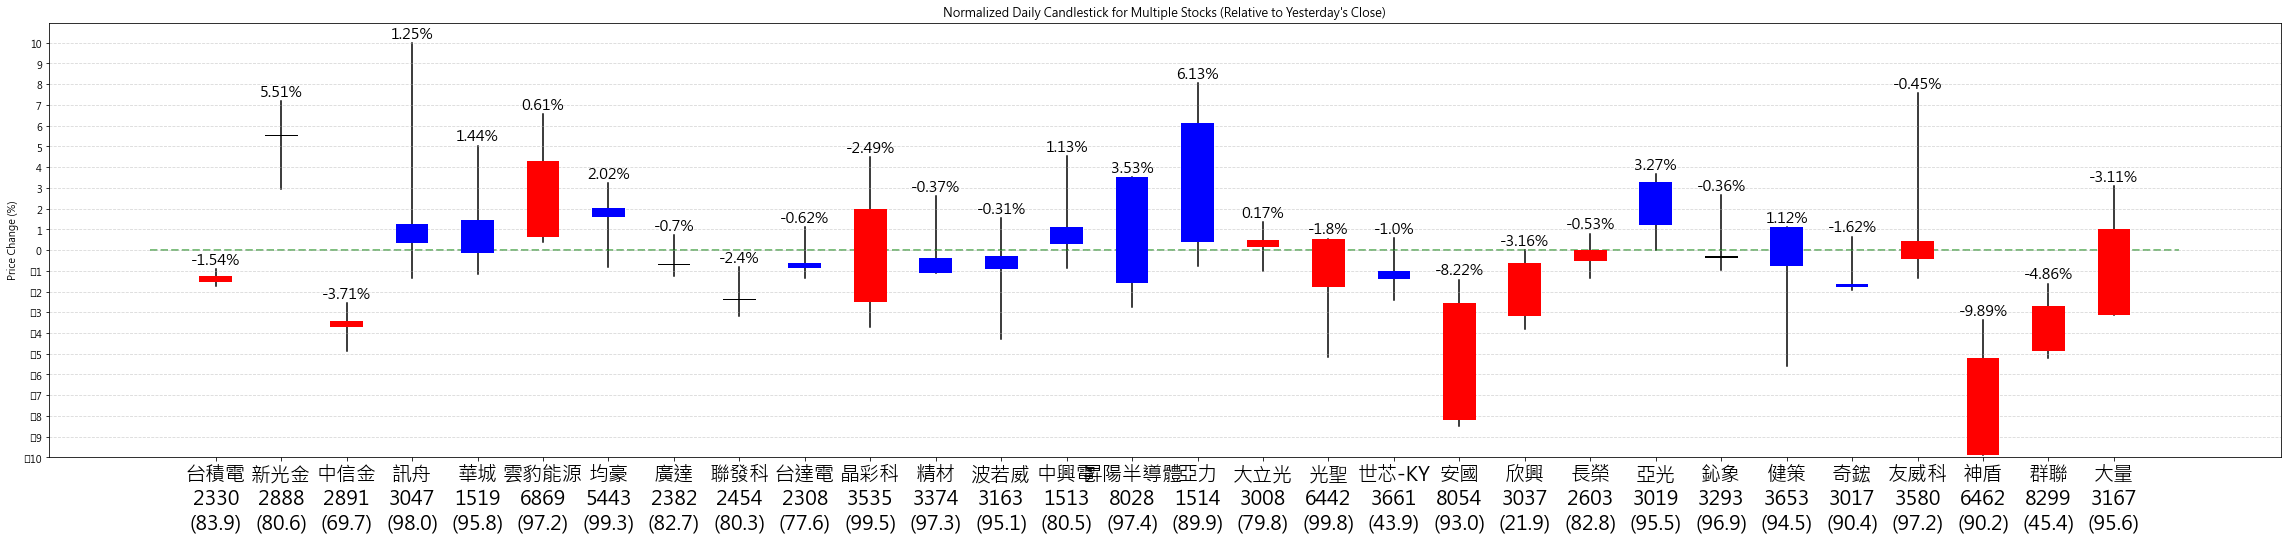

台積電 2330 | RS(83.9 -> 83.9) (0.0) | CF(100.0 -> 100.0) (0.0)  |  IC製造 電子上游_IC_代工 
新光金 2888 | RS(80.6 -> 80.6) (0.0) | CF(99.9 -> 99.9) (0.0)  |  金融業 金融_金控 
中信金 2891 | RS(69.7 -> 69.7) (0.0) | CF(99.9 -> 99.9) (0.0)  |  金融業 服務業 金融_金控 
訊舟 3047 | RS(98.0 -> 98.0) (0.0) | CF(99.8 -> 99.8) (0.0)  |  通訊設備 電子中游_網通 
華城 1519 | RS(95.8 -> 95.8) (0.0) | CF(99.7 -> 99.7) (0.0)  |  電力設備 傳產_電機 
雲豹能源 6869 | RS(97.2 -> 97.2) (0.0) | CF(99.6 -> 99.6) (0.0)  |  電力設備 電力 太陽能 
均豪 5443 | RS(99.3 -> 99.3) (0.0) | CF(99.6 -> 99.6) (0.0)  |  機械 設備儀器廠商 電子上游_IC_其他 
廣達 2382 | RS(82.7 -> 82.7) (0.0) | CF(99.5 -> 99.5) (0.0)  |  電腦系統業 電子下游_筆記型電腦 
聯發科 2454 | RS(80.3 -> 80.3) (0.0) | CF(99.4 -> 99.4) (0.0)  |  手機零組件 IC設計 電子上游_IC_設計 
台達電 2308 | RS(77.6 -> 77.6) (0.0) | CF(99.4 -> 99.4) (0.0)  |  車用電子 太陽能 Internet技術與基礎設施 電子中游_EMS 汽機車零組件 軟體業 機械 被動元件 顯示器 電力設備 LED 通訊設備 電子零件元件 
晶彩科 3535 | RS(99.5 -> 99.5) (0.0) | CF(99.3 -> 99.3) (0.0)  |  電子中游_儀器設備工程 設備儀器廠商 
精材 3374 | RS(97.3 -> 97.3) (0.0) | CF(99.2 -> 99.2) (0.0)  |  IC

,count
category,
IC設計,5
電子零件元件,5
電子上游_IC_設計,5
電力設備,5
傳產_電機,4
設備儀器廠商,4
機械,3
數位相機,2
電子中游_儀器設備工程,2


In [7]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
## set plt xticks font style (Microsoft JhengHei)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

alist = []
industry_category_df = []
show = True

CF_df = rschoose_df.sort_values(by='busness volume(億)', ascending=False)
CF_df = CF_df.reset_index(drop=True)
CF_df['CF'] = [round(100-(i/14), 1) for i in CF_df.index.values]

CF_y_d_df = rschoose_y_d_df.sort_values(by='busness volume(億)', ascending=False)
CF_y_d_df = CF_y_d_df.reset_index(drop=True)
CF_y_d_df['CF'] = [round(100-(i/14), 1) for i in CF_y_d_df.index.values]

CF_top = CF_df.iloc[:30]['ID'].astype(str).values
B = 0
R = 0
to_watch = CF_top
def get_OHLC(id, date, yesterday):
    path = 'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/history_data/'
    try:
        folder = f'{path}{id}.TW.csv'
        df = pd.read_csv(folder)
    except FileNotFoundError:
        folder = f'{path}{id}.TWO.csv'
        df = pd.read_csv(folder)
    row = df.loc[df['Date'] == date]
    yesterday_close = row['Adj Close'].values[0]/(1+row['ROCP'].values[0]/100)
    adj_close = (row['Adj Close']).values[0]
    adj_open = (row['Open'] + row['Adj Close'] - row['Close']).values[0]
    adj_high = (row['High'] + row['Adj Close'] - row['Close']).values[0]
    adj_low = (row['Low'] + row['Adj Close'] - row['Close']).values[0]
    adj_open = (adj_open - yesterday_close)/yesterday_close*100
    adj_high = (adj_high - yesterday_close)/yesterday_close*100
    adj_low = (adj_low - yesterday_close)/yesterday_close*100
    adj_close = (adj_close - yesterday_close)/yesterday_close*100
    # print(adj_open, adj_high, adj_low, adj_close)
    return  adj_open, adj_high, adj_low, adj_close

# print(plot_K_line_df)

for id in to_watch:
    stock_ind = []
    stock_ind.append(CF_df.loc[CF_df['ID'].astype(str) == id, 'ES250rate'].values[0])
    stock_ind.append(CF_df.loc[CF_df['ID'].astype(str) == id, 'CF'].values[0])
    stock_ind.append(CF_y_d_df.loc[CF_y_d_df['ID'].astype(str) == id, 'ES250rate'].values[0])
    stock_ind.append(CF_y_d_df.loc[CF_y_d_df['ID'].astype(str) == id, 'CF'].values[0])
    stock_ind.append(CF_df.loc[CF_df['ID'].astype(str) == id, 'Name'].values[0])
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
    # for col in concept_df.columns.values:
    #     if id in concept_df[col].values:
    #         stock_ind.append(col)
    alist.append((id,stock_ind))

plot_K_line_df = pd.DataFrame([], columns=['ID', 'Open', 'High', 'Low', 'Close'])
fig, ax = plt.subplots(figsize=(40, 8))  # 設定畫布大小

for i, id in enumerate(CF_top):
    Open, High, Low, Close = get_OHLC(id, d, y_d)
    
    plot_K_line_df = pd.concat([plot_K_line_df, pd.DataFrame([[id, Open, High, Low, Close]], columns=['ID', 'Open', 'High', 'Low', 'Close'])], ignore_index=True).astype(float)

    # 繪製 K 線圖
  
    data = plot_K_line_df.loc[plot_K_line_df['ID'] == float(id), ['Open', 'High', 'Low', 'Close']]
    if data['Close'].values > data['Open'].values:
        color = 'b'
        B += 1
    else:
        color = 'r'
        R += 1
    color = 'b' if data['Close'].values > data['Open'].values else 'r'
    if data['Open'].values == data['Close'].values:
        data['Open'] = data['Close'] + 0.05
        color = 'black'

    # 繪製最高到最低的線
    ax.plot([i, i], [data['Low'].values, data['High'].values], color='black', zorder=1, linewidth=1.5)
    # 再繪製開盤到收盤的實體部分
    ax.bar(i, height=abs(data['Close'].values - data['Open'].values), bottom=min(data['Open'].values, data['Close'].values), color=color, zorder=2, width=0.5)
    # 繪製漲跌幅
    ROCP = float(data['Close'].values)
    ax.text(i, data['High'].values+0.4, f"{round(ROCP, 2)}%", color='black', fontsize=15, ha='center', va='center')
ax.plot([-1, i+1], [0, 0], color='g', zorder=1, linewidth=2, linestyle='--', alpha=0.5)
ax.set_xticks(range(i+1))
ax.set_xticklabels([f'{alist[i][1][4]}\n{ID}\n({alist[i][1][0]})' for i, ID in enumerate(plot_K_line_df['ID'].values.astype(int))], fontsize=20)
ax.set_title("Normalized Daily Candlestick for Multiple Stocks (Relative to Yesterday's Close)")
ax.set_ylabel("Price Change (%)")
ax.set_yticks(range(-10, 11, 1), fontsize=20)
ax.grid(axis='y', linestyle='--', alpha=0.5)
print(f"收高: {B}, 收低: {R}")
print(f'avg RS: {round(CF_df["ES250rate"].mean(), 2)}')
plt.show()

for ind in alist:
    if show:
        print(f'{ind[1][4]} {ind[0]}', f'| RS({ind[1][2]} -> {ind[1][0]}) ({round(ind[1][0]-ind[1][2], 1)}) | CF({ind[1][3]} -> {ind[1][1]}) ({round(ind[1][1]-ind[1][3], 1)})', ' | ', end=' ')
    for i in set(ind[1][5:]):
        if show:
            print(i, end=' ')
        industry_category_df.append([ind[0], i])
    print('')
industry_category_df = pd.DataFrame(industry_category_df,columns=['ID', 'category'])
industry_category_df['count'] = 1
industry_category_df = industry_category_df.groupby('category').sum()
count_df = industry_category_df.sort_values(by='count', ascending=False)
ipd.display(count_df.iloc[:20])


## 匯出產業股票到Tradingview

In [1]:
def get_tradingview_format():
    # ============上市股票df============
    url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
    response = requests.get(url, timeout=5)
    print(response.status_code)
    listed = pd.read_html(response.text)[0]
    listed.columns = listed.iloc[0,:]
    listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
    listed = listed.iloc[1:]

    # ============上櫃股票df============
    urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
    response = requests.get(urlTWO, timeout=5)
    print(response.status_code)
    listedTWO = pd.read_html(response.text)[0]
    listedTWO.columns = listedTWO.iloc[0,:]
    listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
    listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

    # ============上市股票代號+.TW============
    stock_1 = listed["有價證券代號"]
    stock_num = stock_1.apply(lambda x: str(x) + ".TW")
    stock_num.loc[len(stock_num)+1] = '0050.TW'
    stock_num.loc[len(stock_num)+1] = '^TWII'
    # print(stock_num)

    # ============上櫃股票代號+.TWO============
    stock_2 = listedTWO["有價證券代號"]
    stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
    # print(stock_num2)

    # ============concate全部股票代號============
    stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
    # print(stock_num)
    allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
    allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
    allstock_info.set_index('ID', inplace = True)
    # print(allstock_info)
    return allstock_info
import pandas as pd
from datetime import datetime
import numpy as np
import os
import requests
import IPython.display as ipd

d = '2025-01-20'
industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
group_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
concept_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
# rs = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\250RS選股\{d}250RS選股.xlsx')['ID].astype(str)
rschoose_df = pd.read_excel(fr'C:\Users\User\Desktop\Stock\全個股條件篩選\daily_stock_summary_{d}_with_template.xlsx')
rs = rschoose_df.loc[rschoose_df['ERS_rate_250'] > 80, 'ID'].astype(str)
rschoose_df['ID'] = rschoose_df['ID'].apply(lambda x: str(x).split('.')[0])

try:
    a = allstock_info
except NameError:
    allstock_info = get_tradingview_format()
else:
    pass
# 建立所有股票產業
all3 = []
for id in rschoose_df['ID'].astype(str):
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all3.append([col, id, 1])
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
            all3.append([col, id, 1])
    for col in concept_df.columns.values:
        if id in concept_df[col].values:
            stock_ind.append(col)
            all3.append([col, id, 1])
all_df3 = pd.DataFrame(all3, columns=['industry', 'ID', 'count'])

200
200


In [3]:
from IPython.display import clear_output
import IPython.display as display
from time import sleep as delay
    # 看特定產業股票的產業

show = True
show_all = False
save_to_txt = True
description = '01205G'
if show_all:
    CF_threshold = 1800
    ES_threshold = 1800
else:
    CF_threshold = 800
    ES_threshold = 300
# variable == intersection or union
ES_sort_standard = 'ERS_rate_20'

mode = 'union'
all_text = ''
industry_name_list = '5G'.split('.')
for industry_name in industry_name_list:
    alist = []
    industry_category_df = []
    clear_output()
    sort_stocks = rschoose_df.sort_values(by='business volume(億)', ascending=False).iloc[:CF_threshold]
    sort_stocks.reset_index(drop=True, inplace=True)
    sort_stocks['CF'] = [round(100-(i/14), 1) for i in sort_stocks.index.values]
    # ES250前20%
    sort_stocks_ES = rschoose_df.sort_values(by=ES_sort_standard, ascending=False).iloc[:ES_threshold]
    print(f'RS > {100 - round(ES_threshold/14, 2)}% : {sort_stocks_ES.shape[0]}支 | CF > {100 - round(CF_threshold/14, 2)}% : {sort_stocks.shape[0]}支')
    # 合併共有股票
    sort_stocks = sort_stocks.loc[sort_stocks['ID'].isin(sort_stocks_ES['ID'])]
    print(f'RS > {100 - round(ES_threshold/14, 2)}% & CF > {100 - round(CF_threshold/14, 2)}% : {sort_stocks.shape[0]}支')
    # 特定產業
    industry_text_name = '###'
    industry_name = industry_name.split(' ')
    if mode == 'intersection':
        for i, industry in enumerate(industry_name):
            industry_ID_list = all_df3.loc[all_df3['industry'].isin([industry])]['ID'].values
            print(f'{industry} : {industry_ID_list.shape[0]}支')
            if i == 0:
                industry_stock = industry_ID_list
            else:
                industry_stock = np.intersect1d(industry_stock, industry_ID_list)      
            industry_text_name += industry
            industry_text_name += ' & '
    else:
        industry_stock = all_df3.loc[all_df3['industry'].isin(industry_name)]['ID'].values
        for industry in industry_name:
            industry_text_name += industry
            industry_text_name += ' | '
        # print(f'{industry_name} : {industry_stock.shape[0]}')

    print(f'{industry_name} : {industry_stock.shape[0]}支')
    sort_stocks_id = sort_stocks.loc[sort_stocks['ID'].astype(str).isin(industry_stock)]['ID'].astype(str).values
    # sort by stock ID
    sort_stocks_id = sort_stocks_id[np.argsort(sort_stocks_id)]
    print(f'{industry_name} after fillter : {sort_stocks_id.shape[0]}支')
    
    # 全部的產業股票
    for id in sort_stocks_id:
        stock_ind = []
        stock_ind.append(rschoose_df.loc[rschoose_df['ID'].astype(str) == id, ES_sort_standard].values[0])
        stock_ind.append(sort_stocks.loc[sort_stocks['ID'].astype(str) == id, 'CF'].values[0])
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
        # for col in group_df.columns.values:
        #     if id in group_df[col].values:
        #         stock_ind.append(col)
        for col in concept_df.columns.values:
            if id in concept_df[col].values:
                stock_ind.append(col)
        alist.append((id, stock_ind))
    for ind in alist:
        if show:
            print(ind[0], f'| RS({ind[1][0]}) | CF({ind[1][1]})', '-->', end=' ')
        for i in set(ind[1][2:]):
            if show:
                print(i, end=' ')
            industry_category_df.append([ind[0], i])
        print('')
    industry_category_df = pd.DataFrame(industry_category_df,columns=['ID', 'category'])
    industry_category_df['count'] = 1
    industry_category_df = industry_category_df.groupby('category').sum()
    count_df = industry_category_df.sort_values(by='count', ascending=False)
    display.display(count_df.head(15))
    # ID轉成tradingview的格式
    text = ''
    for id in list(map(lambda x:x[0], alist)):
        id = str(id)
        if allstock_info.loc[id, '市場別'] == '上櫃':
            text += f'TPEX:{id}\n'
        elif allstock_info.loc[id, '市場別'] == '上市':
            text += f'TWSE:{id}\n'
        # create and save to txt
    all_text = all_text + industry_text_name + '\n'
    all_text += text
if save_to_txt == True:
    with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{description}.txt', 'w', encoding='utf-8') as f:
        f.write(all_text)
print(f'{description}{industry_name}.txt saved')
    

RS > 78.57% : 300支 | CF > 42.86% : 800支
RS > 78.57% & CF > 42.86% : 207支
['5G'] : 40支
['5G'] after fillter : 11支
2395 | RS(86.34336677814939) | CF(84.7) --> 物聯網 智慧城市 電腦系統業 5G 3D列印 機器人 車用電子 一帶一路 CES 人工智慧 無人機 
2454 | RS(84.50390189520624) | CF(99.6) --> A股入摩 wifi6 無線耳機 Chromebook CES MIH概念股 智慧音箱 NFC FANG 鴻海MIH電動車品牌 行動支付 小米 手機零組件 車聯網 軌道衛星 apple 5G 快速充電 MWC IC設計 物聯網 無線充電 applepay PS5 穿戴式裝置 第三方支付 車用電子 人工智慧 無人機 
2498 | RS(99.10813823857302) | CF(99.4) --> 軟體業 生物辨識 無線充電 穿戴式裝置 元宇宙 雙十一 資訊月 5G VR CES MWC UA 手機 消費性電子產品 NFC 
3081 | RS(99.55406911928651) | CF(99.3) --> 5G IC製造 元宇宙 3D感測 
3163 | RS(95.31772575250837) | CF(97.4) --> 5G 光通訊 
3363 | RS(99.21962095875139) | CF(91.4) --> 5G 光通訊 
3491 | RS(97.49163879598662) | CF(96.4) --> 通訊設備 軌道衛星 5G 濾波器 CES 
3596 | RS(87.9041248606466) | CF(83.6) --> 物聯網 通訊設備 美元升值 5G 遠距教學概念股 wifi6 CES MWC Open_RAN 消費性電子產品 居家辦公(WFH) 
4971 | RS(96.3210702341137) | CF(79.7) --> 車聯網 5G 軍工 車用電子 ADAS IC製造 
5388 | RS(93.5340022296544) | CF(96.4) --> 物聯網 通訊設備 車聯網 美元升值 自動駕駛 5G 遠

,count
category,
5G,11
CES,7
物聯網,5
車用電子,4
通訊設備,4
車聯網,4
MWC,4
wifi6,4
遠距教學概念股,3


01205G['5G'].txt saved


## 0

In [ ]:
from yahoo_fin import stock_info as si
import pandas as pd

# 獲取台積電 (TSM) 的歷史交易數據
ticker = "TSM"  # 替換為你需要的台灣股票代碼
data = si.get_data(ticker, start_date="2022-01-01", end_date="2022-01-31")

# 顯示數據
print(data)


In [27]:
# 看股票產業
individual = '1616 3167 2439'.split(' ')
buy_list = BUY_LIST
hold_list = HOLD_LIST
watch_list = WATCH_LIST
t5_list = T5_LIST
t5_2_list = T5_2_LIST
t6_list = T6_LIST
t11_list = T11_LIST
week_choose_list = WEEK_CHOOSE_LIST
day_choose_list = DAY_CHOOSE_LIST
all_ID = list(set(t5_list + t5_2_list + t6_list + t11_list))
save_to_txt = True
# 金流前20%
sort_stocks = rschoose_df.sort_values(by='busness volume(億)', ascending=False).iloc[:2000]
# ES250前20%
sort_stocks_ES = rschoose_df.sort_values(by='ES250rate', ascending=False).iloc[:2000]
# 合併共有股票
# sort_stocks = sort_stocks.loc[sort_stocks['ID'].isin(sort_stocks_ES['ID'])]
# 特定產業
industry_name = ['橡膠工業']
industry_stock = all_df2.loc[all_df2['industry'].isin(industry_name)]['ID'].values
sort_stocks = sort_stocks.loc[sort_stocks['ID'].astype(str).isin(industry_stock)]['ID'].astype(str).values

# volume_sort_stocks = volume_sort_stocks.loc[volume_sort_stocks['產業別'].isin(['設備儀器廠商', '光通訊', '印刷電路板相關'])]['ID'].astype(str).values
# print('volume_sort_stocks : ', volume_sort_stocks[0], type(volume_sort_stocks[0]))
# print('all_ID : ', (all_ID))
##########################
to_watch = sort_stocks
##########################
alist = []
industry_category_df = []
show = True

for id in to_watch:
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
    for col in group_df.columns.values:
        if id in group_df[col].values:
            stock_ind.append(col)
    for col in concept_df.columns.values:
        if id in concept_df[col].values:
            stock_ind.append(col)
    alist.append((id,stock_ind))

for ind in alist:
    if show:
        print(ind[0], ':', end=' ')
    for i in ind[1]:
        if show:
            print(i, end=' ')
        industry_category_df.append([ind[0], i])
    print('')
industry_category_df = pd.DataFrame(industry_category_df,columns=['ID', 'category'])
industry_category_df['count'] = 1
industry_category_df = industry_category_df.groupby('category').sum()
count_df = industry_category_df.sort_values(by='count', ascending=False)
display.display(count_df)
## 是否要存成txt
def get_tradingview_format():
    import requests
    import pandas as pd
    import numpy as np
    import warnings
    import datetime
    warnings.filterwarnings('ignore')
    # ============上市股票df============
    url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
    response = requests.get(url)
    listed = pd.read_html(response.text)[0]
    listed.columns = listed.iloc[0,:]
    listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
    listed = listed.iloc[1:]

    # ============上櫃股票df============
    urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
    response = requests.get(urlTWO)
    listedTWO = pd.read_html(response.text)[0]
    listedTWO.columns = listedTWO.iloc[0,:]
    listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
    listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

    # ============上市股票代號+.TW============
    stock_1 = listed["有價證券代號"]
    stock_num = stock_1.apply(lambda x: str(x) + ".TW")
    stock_num.loc[len(stock_num)+1] = '0050.TW'
    stock_num.loc[len(stock_num)+1] = '^TWII'
    # print(stock_num)

    # ============上櫃股票代號+.TWO============
    stock_2 = listedTWO["有價證券代號"]
    stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
    # print(stock_num2)

    # ============concate全部股票代號============
    stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
    # print(stock_num)
    allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
    allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
    allstock_info.set_index('ID', inplace = True)
    # print(allstock_info)
    return allstock_info
if save_to_txt:
    allstock_info = get_tradingview_format()
    text = ''
    for id in list(map(lambda x:x[0], alist)):
        id = str(id)
        if allstock_info.loc[id, '市場別'] == '上櫃':
            text += f'TPEX:{id}\n'
        elif allstock_info.loc[id, '市場別'] == '上市':
            text += f'TWSE:{id}\n'
        # create and save to txt
    with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{industry_name[0]}ES.txt', 'w', encoding='utf-8') as f:
        f.write(text)
    print(f'{industry_name[0]}ES.txt saved')

2101 : 橡膠工業 資產股 傳產_橡膠 資產股 
2105 : 橡膠工業 傳產_橡膠 共享單車 電動車 MIH概念股 鴻海MIH電動車品牌 一帶一路 
2103 : 橡膠工業 傳產_橡膠 
2107 : 石化業 橡膠工業 地產 運輸事業 資產股 傳產_橡膠 資產股 
2104 : 橡膠工業 醫藥產業 傳產_橡膠 電動車 新藥 寧德時代 
2102 : 橡膠工業 資產股 傳產_橡膠 資產股 
2106 : 橡膠工業 傳產_橡膠 共享單車 MIH概念股 車用電子 
2108 : 橡膠工業 傳產_橡膠 
2109 : 橡膠工業 傳產_橡膠 
6582 : 橡膠工業 傳產_橡膠 
2114 : 橡膠工業 傳產_橡膠 


,count
category,
傳產_橡膠,11
橡膠工業,11
資產股,6
MIH概念股,2
共享單車,2
電動車,2
一帶一路,1
地產,1
寧德時代,1


橡膠工業ES.txt saved


In [ ]:
number_of_stock = []
for col in industry_df.columns.values:
    n = len(industry_df.loc[industry_df[col] != '0', col].values)
    number_of_stock.append([col, n])
number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])

In [ ]:
# 建立所有股票產業
rs_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\250RS選股\2023-06-16250RS選股.xlsx').astype(str)
a = rs_df['RS 20rate'].astype(int)>=80
rs20 = rs.loc[a]
all = []
for id in rs20:
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
            all.append([col, id, 1])
rs20_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])

In [ ]:
rs_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
rs_industry['all number'] = 1
for industry in rs_industry.index.values:
    rs_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
    rs_industry.loc[industry, 'percentage'] = round(100*rs_industry.loc[industry, 'count']/rs_industry.loc[industry, 'all number'],1)

In [ ]:
rs_industry.to_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\產業\2023-06-3020RS.xlsx')
rs_industry
